In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

# Data analysis and preparation
------

### Meta Data:
 - application_id: Unique identifier for each application
 - gender: Applicant's gender (e.g., Male, Female)
 - international: International student(TRUE/FALSE)
 - gpa: Grade Point Average of the applicant
 - major: Undergraduate major (e.g., STEM, Humanities)
 - race: Racial background of the applicant (e.g., White, Black, Asian)
 - gmat: GMAT score of the applicant
 - work_exp: Number of years of work experience (Year)
 - work_industry: Industry of the applicant's previous work experience (e.g., Finance, Technology)
 - admission: Admission status (e.g., Admit, Waitlist, Null: Deny)

In [2]:
df = pd.read_csv('MBA.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['application_id', 'gender', 'international', 'gpa', 'major', 'race',
       'gmat', 'work_exp', 'work_industry', 'admission'],
      dtype='object')
(6194, 10)


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


### Work with duplicates
-------------------------

In [3]:
# Check for duplicates
duplicates_exist = df.duplicated().any()
print(f"Are there duplicates in the DataFrame: {duplicates_exist}")

# number of duplicated
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Are there duplicates in the DataFrame: False
Number of duplicates: 0


### Work with NaN
-----------------

In [4]:
df.isnull().sum() 

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [5]:
df['race'] = df['race'].fillna('Unknown')
df['admission'] = df['admission'].fillna('Deny')
print(df['race'].unique())
print(df['admission'].unique())

['Asian' 'Black' 'Unknown' 'Hispanic' 'White' 'Other']
['Admit' 'Deny' 'Waitlist']


In the **"race"** column, the categories **'Other'** and **'Unknown'** were combined into a new category 'Unknown/Other', as they carry the same meaning. This decision was made to increase statistical significance, reduce data sparsity, and simplify the model.

In [6]:
df['race'] = df['race'].replace({'Other': 'Unknown/Other', 'Unknown': 'Unknown/Other'})

### Determining class imbalance
--------------------------------

In [7]:
from scipy.stats import entropy

def create_imbalance_pie_chart(df):
    df_columns = df.select_dtypes(include=['object', 'category']).columns
    n_cols = len(df_columns)
    
    if n_cols == 0:
        print("No categorical columns found in the dataframe.")
        return
    
    n_rows = (n_cols + 1) // 2  # Calculate number of rows needed
    
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, 5*n_rows))
    axs = axs.flatten()  # Flatten the 2D array of axes
    
    for i, column in enumerate(df_columns):
        class_counts = df[column].value_counts().sort_values(ascending=False)
        
        # Calculate Imbalance ratio
        imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[-1]
        
        axs[i].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{column}\nImbalance ratio: {imbalance_ratio:.2f}')
    
    # Remove any unused subplots
    for i in range(n_cols, len(axs)):
        fig.delaxes(axs[i])
    
    plt.tight_layout()
    plt.show()



def analyze_imbalance(df, column):
    # for column in columns:
    print(f"\nAnalysis for column: {column}")
    
    # Count values
    value_counts = df[column].value_counts()
    total_count = len(df[column])
    
    print("Value counts:")
    for value, count in value_counts.items():
        percentage = (count / total_count) * 100
        print(f"{value}: {count} ({percentage:.2f}%)")
    
    # Calculate imbalance ratio
    imbalance_ratio = value_counts.max() / value_counts.min()
    print(f"\nImbalance ratio: {imbalance_ratio:.2f}")
    
    # Calculate entropy (measure of uniformity)
    ent = entropy(value_counts)
    max_ent = np.log2(len(value_counts))
    normalized_ent = ent / max_ent
    print(f"Normalized entropy: {normalized_ent:.2f}")
    
    # Gini impurity
    gini = 1 - np.sum((value_counts / total_count) ** 2)
    print(f"Gini impurity: {gini:.2f}")
    
    # Simpson's diversity index
    simpson = 1 - np.sum((value_counts * (value_counts - 1)) / (total_count * (total_count - 1)))
    print(f"Simpson's diversity index: {simpson:.2f}")
    
    # Interpretation
    if imbalance_ratio > 10:
        print("Interpretation: Severe imbalance")
    elif imbalance_ratio > 3:
        print("Interpretation: Moderate imbalance")
    else:
        print("Interpretation: Mild or no significant imbalance")
    
    print("\n" + "-"*50)


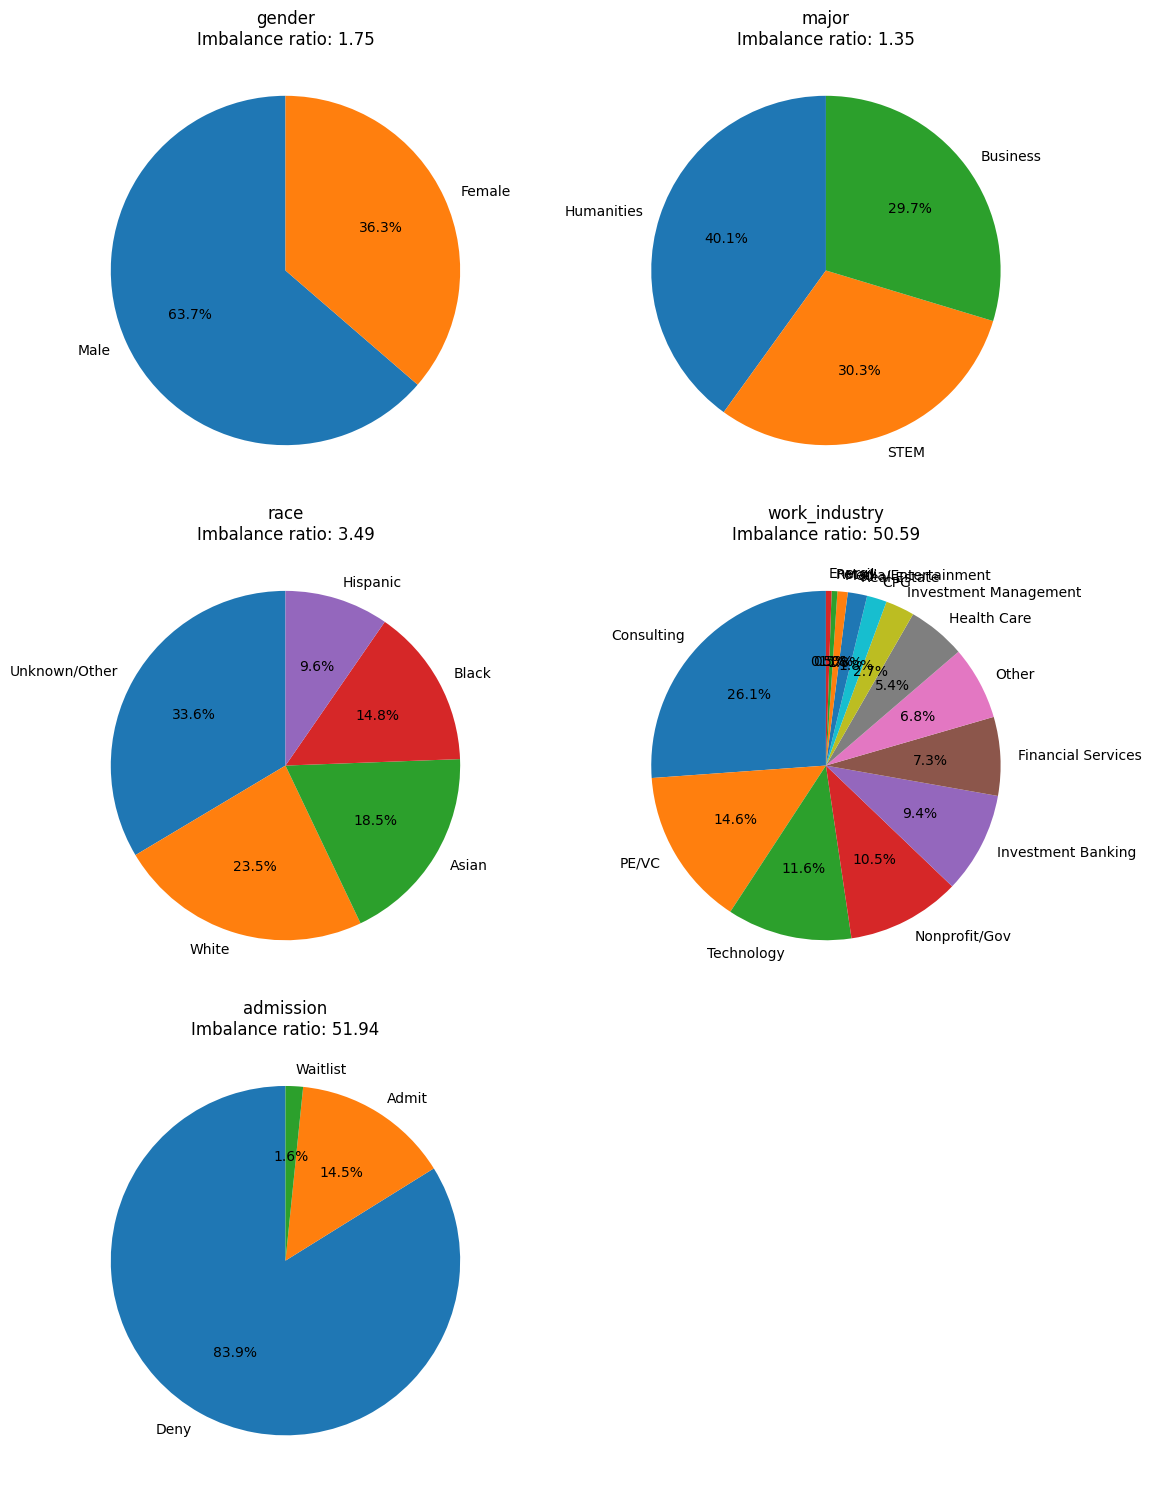

In [8]:
create_imbalance_pie_chart(df)

In [9]:
print(analyze_imbalance(df, 'work_industry'))


Analysis for column: work_industry
Value counts:
Consulting: 1619 (26.14%)
PE/VC: 907 (14.64%)
Technology: 716 (11.56%)
Nonprofit/Gov: 651 (10.51%)
Investment Banking: 580 (9.36%)
Financial Services: 451 (7.28%)
Other: 421 (6.80%)
Health Care: 334 (5.39%)
Investment Management: 166 (2.68%)
CPG: 114 (1.84%)
Real Estate: 111 (1.79%)
Media/Entertainment: 59 (0.95%)
Retail: 33 (0.53%)
Energy: 32 (0.52%)

Imbalance ratio: 50.59
Normalized entropy: 0.58
Gini impurity: 0.86
Simpson's diversity index: 0.86
Interpretation: Severe imbalance

--------------------------------------------------
None


**Work_industry:** 
- Imbalance ratio: 50.59
- Interpretation: Severe imbalance. Special handling is required (resampling, class weighting).  


**Race:**  
- Imbalance ratio: 6.14
- Interpretation: Moderate imbalance. Attention is recommended during modeling.  


**Gender:**
- Imbalance ratio: 1.75
- Interpretation: Mild imbalance. No special handling required.  


**Major:**
- Imbalance ratio: 1.35
- Interpretation: Mild imbalance. Data is well-balanced.  



Focus should be on the **'work_industry'** variable due to its critical imbalance level, and also on the **'race'** variable with moderate imbalance. The **'gender'** and **'major'** variables do not require additional processing.
Analysis of the target variable **'admission'** will be conducted separately.

### Work with categorical data
-----------------------------------------------------

In [10]:
categorical_data = ['gender', 'international', 'major', 'race',
       'work_industry', 'admission']
for column in df[categorical_data]:
    print(f" {column} : {df[column].unique()}")

 gender : ['Female' 'Male']
 international : [False  True]
 major : ['Business' 'Humanities' 'STEM']
 race : ['Asian' 'Black' 'Unknown/Other' 'Hispanic' 'White']
 work_industry : ['Financial Services' 'Investment Management' 'Technology' 'Consulting'
 'Nonprofit/Gov' 'PE/VC' 'Health Care' 'Investment Banking' 'Other'
 'Retail' 'Energy' 'CPG' 'Real Estate' 'Media/Entertainment']
 admission : ['Admit' 'Deny' 'Waitlist']


The goal of our research is to develop a model for predicting the likelihood of candidates being admitted to the course. We will focus on two clear outcomes: **'Admit'** and **'Deny'**.

Our dataset includes a category of candidates awaiting a decision. However, to improve the accuracy of our predictions, we have decided to exclude this data from the model training. This will allow us to work only with candidates for whom a final decision has already been made, thereby enhancing the model`s performance in real-world scenarios.

In [11]:
df = df[df['admission'] != 'Waitlist']

In [12]:
print(df.shape)


(6094, 10)


Based on the analysis of unique values in our dataset and considering the imbalance ratio, we have made the following decisions regarding the transformation of categorical variables into numerical format:
1. For the columns **'major'** and **'race'**, we will apply the **One-Hot Encoding** method, as these variables do not have a natural order and contain many unique values.
2. For the variable **'work_industry'**, we will use **Weight of Evidence (WoE) Encoding** due to its high imbalance ratio (50.59). This method will help address the severe class imbalance and potentially improve the model's performance.
3. For the variables **'gender'**, **'international'**, and **'admission'**, we will use **Label Encoding** due to their binary nature, where each variable has two possible values.  


This approach will allow us to effectively transform categorical data into numerical format while preserving their informativeness, addressing the imbalance issue in **'work_industry'**, and ensuring optimal preparation for subsequent analysis and modeling.
The implementation will involve:
- One-Hot Encoding for **'major'** and **'race'**
- WoE Encoding for **'work_industry'**
- Label Encoding for **'gender'**, **'international'**, and **'admission'**
This strategy aims to balance the preservation of information, handling of imbalanced data, and preparation of variables for effective model training.

In [13]:

df['gender'] = df['gender'].map({'Male': 1,'Female': 0})
df['international'] = df['international'].map({True: 1, False: 0})
df['admission'] = df['admission'].map({'Admit': 1, 'Deny': 0})
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,0,0,3.30,Business,Asian,620.0,3.0,Financial Services,1
1,2,1,0,3.28,Humanities,Black,680.0,5.0,Investment Management,0
2,3,0,1,3.30,Business,Unknown/Other,710.0,5.0,Technology,1
3,4,1,0,3.47,STEM,Black,690.0,6.0,Technology,0
4,5,1,0,3.35,STEM,Hispanic,590.0,5.0,Consulting,0


In [14]:
from feature_engine.encoding import WoEEncoder

data_for_one_hot_encoding = ['major', 'race']
data_for_woe_encoding = ['work_industry']


# One-Hot Encoding
df_one_hot = pd.get_dummies(df[data_for_one_hot_encoding], prefix=data_for_one_hot_encoding)

# WoE Encoding
woe_encoder = WoEEncoder(variables=data_for_woe_encoding)
df_woe = woe_encoder.fit_transform(df[data_for_woe_encoding], df['admission'])

df_encoded = pd.concat([df_one_hot, df_woe], axis=1)

df_main = df.drop(columns=data_for_one_hot_encoding + data_for_woe_encoding)

df_final = pd.concat([df_main, df_encoded], axis=1)



In [15]:
print(df_final.shape)
df_final.info()

(6094, 16)
<class 'pandas.core.frame.DataFrame'>
Index: 6094 entries, 0 to 6193
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   application_id      6094 non-null   int64  
 1   gender              6094 non-null   int64  
 2   international       6094 non-null   int64  
 3   gpa                 6094 non-null   float64
 4   gmat                6094 non-null   float64
 5   work_exp            6094 non-null   float64
 6   admission           6094 non-null   int64  
 7   major_Business      6094 non-null   bool   
 8   major_Humanities    6094 non-null   bool   
 9   major_STEM          6094 non-null   bool   
 10  race_Asian          6094 non-null   bool   
 11  race_Black          6094 non-null   bool   
 12  race_Hispanic       6094 non-null   bool   
 13  race_Unknown/Other  6094 non-null   bool   
 14  race_White          6094 non-null   bool   
 15  work_industry       6094 non-null   float64
dtype

In [16]:
df_final = df_final.drop('application_id', axis=1)

For model training, we don`t need the **'application_id'** column, so we removed it. Next, we will proceed to analyze of our target variable **'admission'**.

In [17]:
print(analyze_imbalance(df_final, 'admission'))


Analysis for column: admission
Value counts:
0: 5194 (85.23%)
1: 900 (14.77%)

Imbalance ratio: 5.77
Normalized entropy: 0.42
Gini impurity: 0.25
Simpson's diversity index: 0.25
Interpretation: Moderate imbalance

--------------------------------------------------
None


The analysis of the target variable **'admission'** revealed a moderate class imbalance (Imbalance ratio: 5.77). The class distribution shows that 85.23% of candidates were not admitted, while only 14.77% were admitted.

Considering this imbalance, we will take the following steps in building the model:
1. **Selection of Evaluation Metrics:** We will use metrics that are robust to imbalance, such as **F1-score** and **ROC AUC**, instead of simple accuracy.

2. **Adjustment of Class Weights:** We will configure machine learning algorithms to account for class weights to compensate for the imbalance, allowing the model to pay more attention to the minority class.

3. **Optimization of Decision Threshold:** We will experiment with the decision threshold to optimize the balance between precision and recall.  

These measures will help us build a more reliable and effective admission prediction model, despite the observed imbalance in the data.


# Model Selection and Development

In [18]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, balanced_accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
df_final.columns

Index(['gender', 'international', 'gpa', 'gmat', 'work_exp', 'admission',
       'major_Business', 'major_Humanities', 'major_STEM', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_Unknown/Other', 'race_White',
       'work_industry'],
      dtype='object')

In [20]:
features = ['gender', 'international', 'gpa', 'gmat', 'work_exp',
       'major_Business', 'major_Humanities', 'major_STEM', 'race_Asian',
       'race_Black', 'race_Hispanic', 'race_Unknown/Other', 'race_White',
       'work_industry']

target = 'admission'

In [21]:
scaler = StandardScaler()

df_copy = df_final.copy()
df_copy[features] = scaler.fit_transform(df_copy[features])

X_train, X_test, y_train, y_test = train_test_split(
    df_copy[features],
    df_copy[target],
    test_size=0.3,
    stratify=df_copy[target],
    random_state=42
)

Our dataset exhibits class imbalance in the **"work_industry"** feature and the target variable **"admission"**.  
This requires a special approach to evaluating model performance. The standard accuracy metric can be misleading in such cases, so we focus on the following metrics:
1) **Balanced Accuracy**: Considers the model`s performance for both classes, which is especially important in imbalanced situations.  
It is calculated as the arithmetic mean of sensitivity (recall) for each class.
2) **Precision**: Shows what proportion of objects classified as positive by the classifier are actually positive.  
Important when the cost of false positive predictions is high.
3) **Recall**: Shows what proportion of positive class objects were identified by the classifier.  
Critical when it`s important to detect as many positive cases as possible.
4) **F1-Score**: The harmonic mean of precision and recall. Provides a balance between these two metrics.  
Particularly useful when a single measure of classification quality is need.
5) **ROC AUC**: Area under the ROC curve. Shows the model`s ability to distinguish between classes regardless of the chosen classification threshold.  
A value of 0.5 corresponds to random guessing, while 1.0 represents perfect classification.  

Using these metrics allows us to more objectively evaluate the performance of models under class imbalance conditions, taking into account the specifics of our task and importance of correct classification for both classes.

In [22]:
import time

def plot_confusion_matrices(y_true, y_pred_list:list, model_names:list, overall_title="Confusion Matrices"):
    
    assert len(y_pred_list) == len(model_names), "Lists must have the same length"

    n = len(y_pred_list)
    fig, axes = plt.subplots(1, n, figsize=(4 * n, 4))

    confusion_matrices = [] 

    for i in range(n):
        conf_matrix = confusion_matrix(y_true, y_pred_list[i])

        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                    xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"],
                    ax=axes[i])
        axes[i].set_title(model_names[i])
        axes[i].set_xlabel("Predicted")
        axes[i].set_ylabel("True")

        confusion_matrices.append({
            'Model': model_names[i],
            'True Negative': conf_matrix[0, 0],
            'False Positive': conf_matrix[0, 1],
            'False Negative': conf_matrix[1, 0],
            'True Positive': conf_matrix[1, 1]
        })

    fig.suptitle(overall_title, fontsize=16)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    conf_matrix_df = pd.DataFrame(confusion_matrices)
    return conf_matrix_df


def create_model_result_table(model_name: str, model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time

    if hasattr(model, 'predict_proba'):
        y_pred_proba = model.predict_proba(X_test)
        if y_pred_proba.shape[1] == 2:
            y_pred_proba = y_pred_proba[:,1]
    else:
        if hasattr(model, "decision_function"):
            y_pred_proba = model.decision_function(X_test)
        else:
            y_pred_proba = y_pred

    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    if len(np.unique(y_test)) == 2:  # Бинарная классификация
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:  # Мультиклассовая классификация
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')

    results = pd.DataFrame([{
        "Model": model_name,
        "Balanced Accuracy": balanced_acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": roc_auc,
        "Training Time (s)": train_time,
        "Prediction Time (s)": predict_time,
        "y_pred": y_pred 
        
    }])
    return results


In [23]:
model_svc = SVC(class_weight='balanced', probability=True)
svc_results = create_model_result_table("SVC", model_svc, X_train, X_test, y_train, y_test)

model_lr = LogisticRegression(class_weight='balanced')
lr_results = create_model_result_table("Logistic Regression", model_lr, X_train, X_test, y_train, y_test)

model_bal_rf = BalancedRandomForestClassifier()
bal_rf_results = create_model_result_table("Balanced Random Forest", model_bal_rf, X_train, X_test, y_train, y_test)

model_easy_ensemble = EasyEnsembleClassifier()
easy_ensemble_results = create_model_result_table("Easy Ensemble", model_easy_ensemble, X_train, X_test, y_train, y_test)

model_xgb = XGBClassifier()
xgb_results = create_model_result_table("XGB Classifier", model_xgb, X_train, X_test, y_train, y_test)

model_lgbm = LGBMClassifier()
lgbm_results = create_model_result_table("LGBM Classifier", model_lgbm, X_train, X_test, y_train, y_test)

all_results = pd.concat([svc_results, lr_results, bal_rf_results, easy_ensemble_results, 
                         xgb_results, lgbm_results], ignore_index=True)


/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


[LightGBM] [Info] Number of positive: 630, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 4265, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.147714 -> initscore=-1.752645
[LightGBM] [Info] Start training from score -1.752645


|    | Model                  |   Balanced Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |   Training Time (s) |   Prediction Time (s) |
|---:|:-----------------------|--------------------:|------------:|---------:|-----------:|----------:|--------------------:|----------------------:|
|  0 | Easy Ensemble          |            0.820502 |    0.888125 | 0.767086 |   0.798756 |  0.865455 |            0.979281 |              0.110120 |
|  1 | Balanced Random Forest |            0.805077 |    0.882178 | 0.751230 |   0.785635 |  0.863258 |            0.634375 |              0.039757 |
|  2 | SVC                    |            0.777754 |    0.871456 | 0.725533 |   0.764252 |  0.842431 |            4.403224 |              0.943471 |
|  3 | Logistic Regression    |            0.767585 |    0.863974 | 0.757791 |   0.789201 |  0.838284 |            0.049923 |              0.003507 |
|  4 | XGB Classifier         |            0.589975 |    0.809361 | 0.838710 |   0.819320 |  0.84764

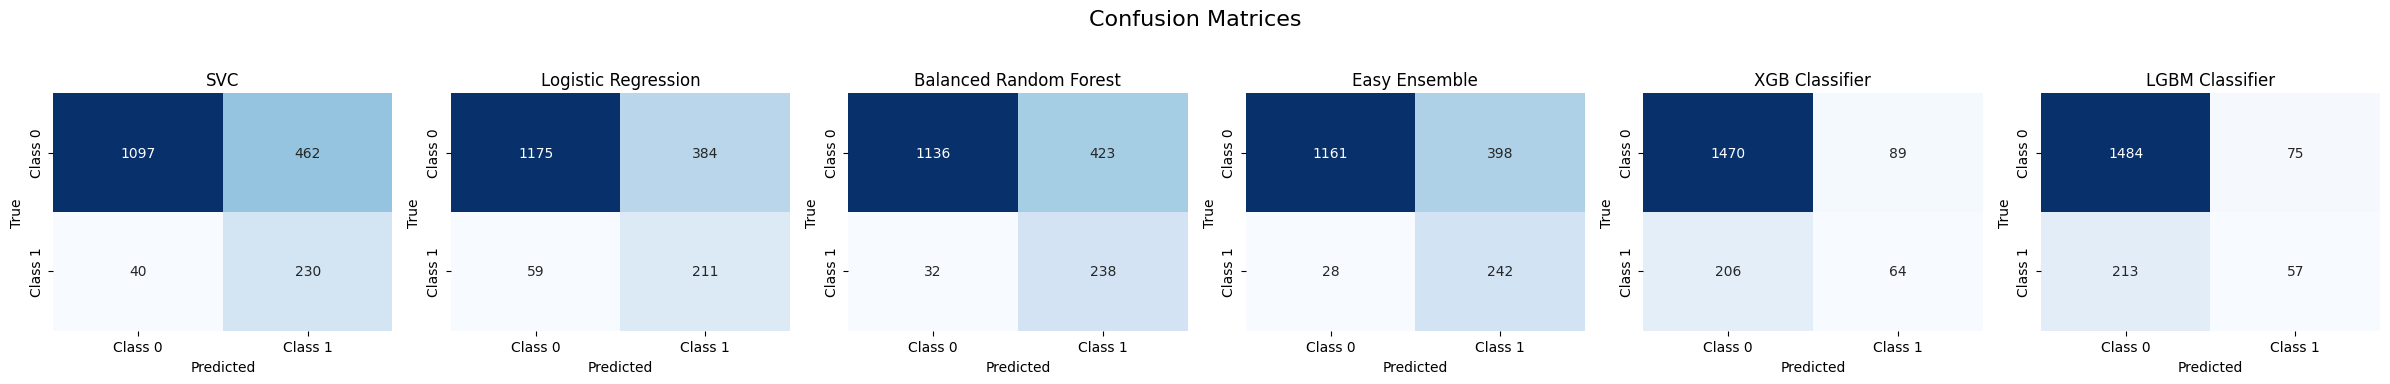

|    | Model                  |   True Negative |   False Positive |   False Negative |   True Positive |
|---:|:-----------------------|----------------:|-----------------:|-----------------:|----------------:|
|  0 | SVC                    |            1097 |              462 |               40 |             230 |
|  1 | Logistic Regression    |            1175 |              384 |               59 |             211 |
|  2 | Balanced Random Forest |            1136 |              423 |               32 |             238 |
|  3 | Easy Ensemble          |            1161 |              398 |               28 |             242 |
|  4 | XGB Classifier         |            1470 |               89 |              206 |              64 |
|  5 | LGBM Classifier        |            1484 |               75 |              213 |              57 |


In [24]:
sorted_results = all_results.drop('y_pred', axis=1).sort_values('Balanced Accuracy', ascending=False).reset_index(drop=True)

print(sorted_results.to_markdown(index=True, floatfmt=".6f"))

y_pred_list = all_results['y_pred'].tolist()
model_names = all_results['Model'].tolist()

conf_matrix_df = plot_confusion_matrices(y_test, y_pred_list, model_names)
print(conf_matrix_df.to_markdown(index=True))

**_Easy Ensemble_** performs the best. It handles both classes well and shows the best balance between correctly identifying positive cases and minimizing errors.  
**_Balanced Random Forest_** is slightly behind **_Easy Ensemble_** but also shows good results.  

**Precision and Recall**:   
**_SVC_** and **_Logistic Regression_** are good at identifying positive cases but miss many of them.  
**_XGB_** and **_LGBM_** find many positive cases but often make mistakes by taking negative cases for positive ones.  

**Processing speed**:   
**_Logistic Regression_** is the fastest.  
**_SVC_** is the slowest.  
**_Easy Ensemble_** and **_Balanced Random Forest_** offer a good balance between quality of work and speed.  

**Error analysis**:  
**_Easy Ensemble_** is the best at finding positive cases while making few mistakes.  
**_XGB_** and **_LGBM_** rarely makes mistakes by taking negative cases for positive ones, but often miss true positive cases.  
**_SVC_** and **_Logistic Regression_** make more evenly.  

**Handling imbalance data**:  
**_Easy Ensemble_** and **_Balanced Random Forest_** better handle the situation when one class is much more numerous than other.  
**_XGB_** and **_LGBM_** seem to focus more on the majority class, which leads to errors in identifying the rare classes.  

In conclusion, **_Easy Ensemble_** seems to be the best choice. It handles imbalanced data well and shows good results across all parameters. But if speed is important, then **_Balanced Random Forest_** or even **_Logistic Regression_** can be a good choice, as they work faster and also show decent results.

In [25]:
from imblearn.over_sampling import SMOTE


# Применение SMOTE только к обучающей выборке
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [26]:
model_svc = SVC(class_weight='balanced', probability=True)
sm_svc_results = create_model_result_table("SMOTE SVC", model_svc, X_train_resampled, X_test,y_train_resampled, y_test)

model_lr = LogisticRegression(class_weight='balanced')
sm_lr_results = create_model_result_table("SMOTE Logistic Regression", model_lr, X_train_resampled, X_test, y_train_resampled, y_test)

model_bal_rf = BalancedRandomForestClassifier()
sm_bal_rf_results = create_model_result_table("SMOTE Balanced Random Forest", model_bal_rf, X_train_resampled, X_test, y_train_resampled, y_test)

model_easy_ensemble = EasyEnsembleClassifier()
sm_easy_ensemble_results = create_model_result_table("SMOTE Easy Ensemble", model_easy_ensemble, X_train_resampled, X_test, y_train_resampled, y_test)

model_xgb = XGBClassifier()
sm_xgb_results = create_model_result_table("SMOTE XGB Classifier", model_xgb, X_train_resampled, X_test, y_train_resampled, y_test)

model_lgbm = LGBMClassifier()
sm_lgbm_results = create_model_result_table("SMOTE LGBM Classifier", model_lgbm, X_train_resampled, X_test, y_train_resampled, y_test)

SMOTE_results = pd.concat([sm_svc_results, sm_lr_results, sm_bal_rf_results, sm_easy_ensemble_results, 
                         sm_xgb_results, sm_lgbm_results], ignore_index=True)



/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


[LightGBM] [Info] Number of positive: 3635, number of negative: 3635
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 7270, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


|    | Model                        |   Balanced Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |   Training Time (s) |   Prediction Time (s) |
|---:|:-----------------------------|--------------------:|------------:|---------:|-----------:|----------:|--------------------:|----------------------:|
|  0 | SMOTE SVC                    |            0.769074 |    0.865436 | 0.744669 |   0.779104 |  0.836379 |            6.106330 |              0.641425 |
|  1 | SMOTE Logistic Regression    |            0.765092 |    0.862914 | 0.756151 |   0.787812 |  0.838477 |            0.010680 |              0.000819 |
|  2 | SMOTE Easy Ensemble          |            0.755171 |    0.858288 | 0.786222 |   0.809921 |  0.829074 |            1.747095 |              0.066329 |
|  3 | SMOTE Balanced Random Forest |            0.641029 |    0.820703 | 0.823948 |   0.822284 |  0.838503 |            0.679624 |              0.020670 |
|  4 | SMOTE XGB Classifier         |            0.611441 |    0

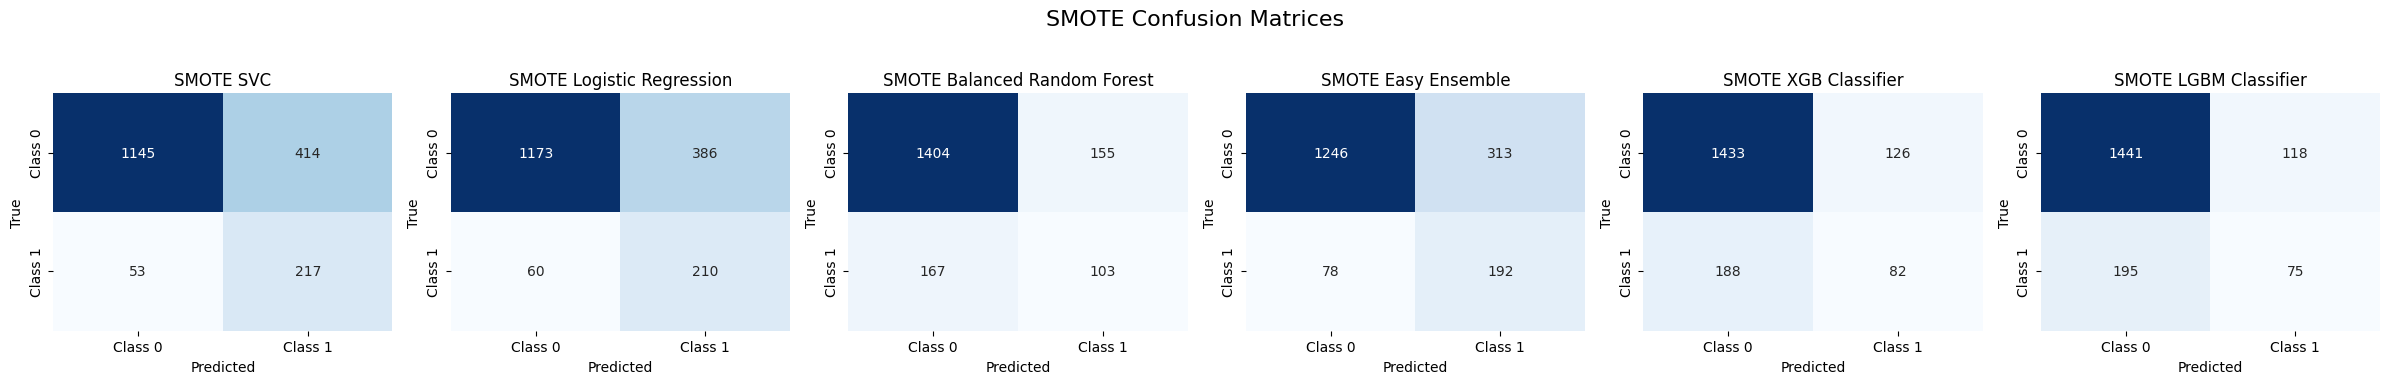

|    | Model                        |   True Negative |   False Positive |   False Negative |   True Positive |
|---:|:-----------------------------|----------------:|-----------------:|-----------------:|----------------:|
|  0 | SMOTE SVC                    |            1145 |              414 |               53 |             217 |
|  1 | SMOTE Logistic Regression    |            1173 |              386 |               60 |             210 |
|  2 | SMOTE Balanced Random Forest |            1404 |              155 |              167 |             103 |
|  3 | SMOTE Easy Ensemble          |            1246 |              313 |               78 |             192 |
|  4 | SMOTE XGB Classifier         |            1433 |              126 |              188 |              82 |
|  5 | SMOTE LGBM Classifier        |            1441 |              118 |              195 |              75 |


In [27]:
SMOTE_sorted_results = SMOTE_results.drop('y_pred', axis=1).sort_values('Balanced Accuracy', ascending=False).reset_index(drop=True)

print(SMOTE_sorted_results.to_markdown(index=True, floatfmt=".6f"))

SMOTE_y_pred_list = SMOTE_results['y_pred'].tolist()
SMOTE_model_names = SMOTE_results['Model'].tolist()

SMOTE_conf_matrix_df = plot_confusion_matrices(y_test, SMOTE_y_pred_list, SMOTE_model_names, overall_title="SMOTE Confusion Matrices")
print(SMOTE_conf_matrix_df.to_markdown(index=True))

In [32]:
print(sorted_results.to_markdown(index=True, floatfmt=".6f"))
print(150*"*")
print(conf_matrix_df.to_markdown(index=True))

|    | Model                  |   Balanced Accuracy |   Precision |   Recall |   F1-Score |   ROC AUC |   Training Time (s) |   Prediction Time (s) |
|---:|:-----------------------|--------------------:|------------:|---------:|-----------:|----------:|--------------------:|----------------------:|
|  0 | Easy Ensemble          |            0.820502 |    0.888125 | 0.767086 |   0.798756 |  0.865455 |            0.979281 |              0.110120 |
|  1 | Balanced Random Forest |            0.805077 |    0.882178 | 0.751230 |   0.785635 |  0.863258 |            0.634375 |              0.039757 |
|  2 | SVC                    |            0.777754 |    0.871456 | 0.725533 |   0.764252 |  0.842431 |            4.403224 |              0.943471 |
|  3 | Logistic Regression    |            0.767585 |    0.863974 | 0.757791 |   0.789201 |  0.838284 |            0.049923 |              0.003507 |
|  4 | XGB Classifier         |            0.589975 |    0.809361 | 0.838710 |   0.819320 |  0.84764